<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-WEEK-11/blob/main/INDEPENDENT_PROJECT_12_REGRESSION(updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEPENDENT PROJECT WK 12: REGRESSION.( Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression, Elastic Net Regression)

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.


---



Dataset


The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 

Below is the dataset glossary:

-  Id 
-  price  - Price of the house
-  bedrooms - Number of Bedrooms
-  bathrooms - Number of Bathrooms
-  sqft_living - Square feet area of living area
-  sqft_lot  - Square feet area of parking Layout
-  floors - Number of Floors
-  waterfront - Whether waterfront is there or not
-  view - Number of Views
-  grade - Grades
-  sqft_above
-  sqft_basement - Square feet area off basement
-  yr_built - Year the house is built
-  yr_renovated - Year the house is renovated
-  zipcode - zipcode os the house
-  lat : Latitude of the house
-  lon : Longitude of the house
-  sqft_living15
-  sqft_lot15

## Defining the question

Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow accurate prediction of the sale of prices upon being provided with the predictor variables.

### Metric for Success
*    The metric for success is being able to create a model that predicts the sale of prices accurately.

## Context


*   Since this is an analysis that includes prediction- extrapolating from current data- then regression analysis suits this analysis best. This is a regression problem



## Experiment design

*    Read and explore given dataset
*    Define the appropriateness of the available data to answer the given question.
*    Data Cleaning
*    Exploratory Data Analysis
*    Univariate, Bivariate Analysis, Multivariate Analysis
*    Performing regression analysis.
(while incorporating categorical independent variables into the models)
*    Checking for multicollinearity
*    Provide a recommendation based on your analysis. 
*    Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
*    Challenging the solution by providing insights on how improvements in  the model can be made.
      

## Reading data

In [ ]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline



In [ ]:
# Reading the data
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
houses = pd.read_csv(url)

## Data Exploration

In [ ]:
# viewing top of the dataset
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Viewing the bottom of the dataset
houses.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking the number of records
houses.shape

(21613, 20)

In [ ]:
# Getting summaries of our data
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Appropriateness

In [ ]:
# Checking the data types
houses.dtypes   # All the data is in a suitable type for insight to be derived from it.

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Data Cleaning

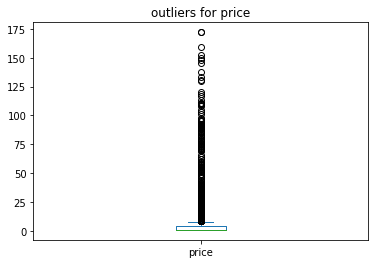

In [ ]:
# Finding outliers in the dataset.

houses['price'].value_counts().plot.box(title='outliers for price');
# Even though there would be outliers in this data, they are all useful observations that were actually recored and not mistaken. So they are not to be dropped.

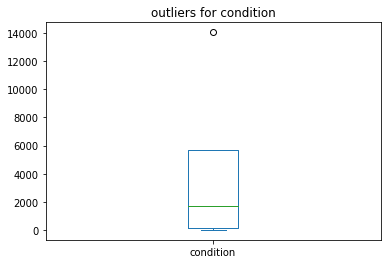

In [ ]:
houses['condition'].value_counts().plot.box(title='outliers for condition')

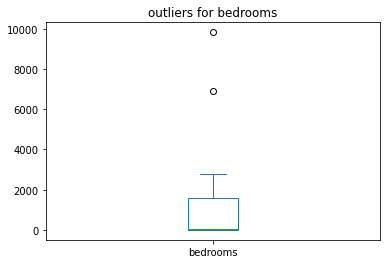

In [ ]:
houses['bedrooms'].value_counts().plot.box(title='outliers for bedrooms')

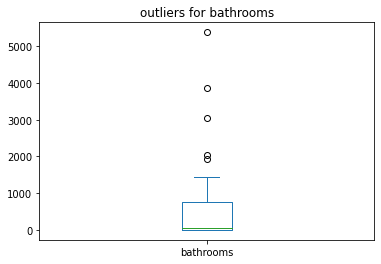

In [ ]:
houses['bathrooms'].value_counts().plot.box(title='outliers for bathrooms')

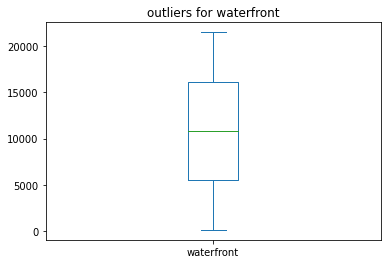

In [ ]:
houses['waterfront'].value_counts().plot.box(title='outliers for waterfront')

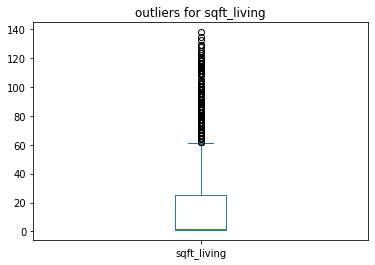

In [ ]:
houses['sqft_living'].value_counts().plot.box(title='outliers for sqft_living')

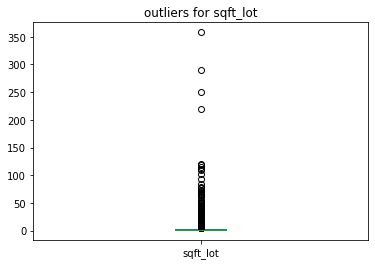

In [ ]:
houses['sqft_lot'].value_counts().plot.box(title='outliers for sqft_lot')

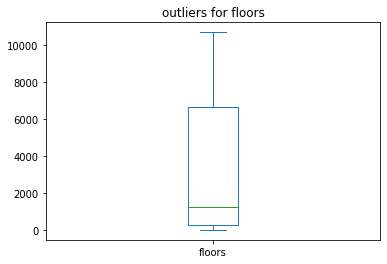

In [ ]:
houses['floors'].value_counts().plot.box(title='outliers for floors')

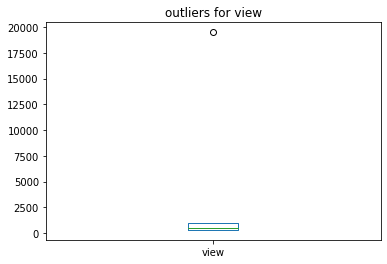

In [ ]:
houses['view'].value_counts().plot.box(title='outliers for view')

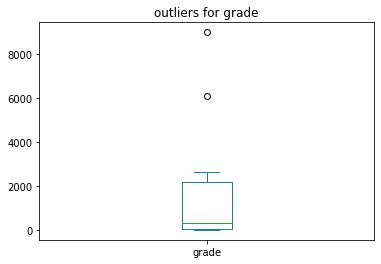

In [ ]:
houses['grade'].value_counts().plot.box(title='outliers for grade')

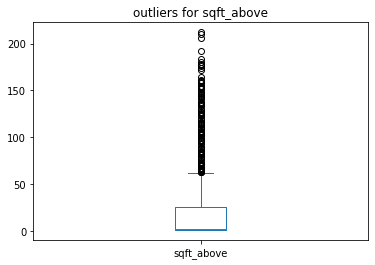

In [ ]:
houses['sqft_above'].value_counts().plot.box(title='outliers for sqft_above')

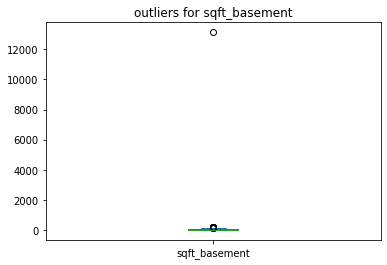

In [ ]:
houses['sqft_basement'].value_counts().plot.box(title='outliers for sqft_basement')

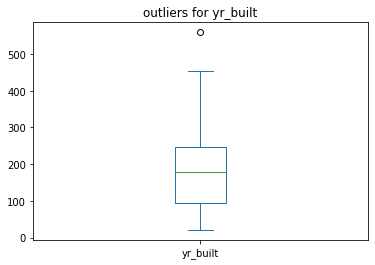

In [ ]:
houses['yr_built'].value_counts().plot.box(title='outliers for yr_built')

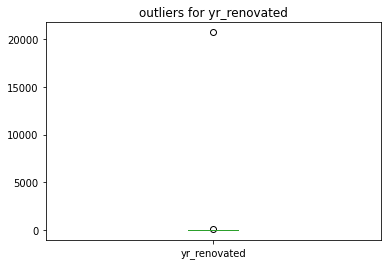

In [ ]:
houses['yr_renovated'].value_counts().plot.box(title='outliers for yr_renovated')

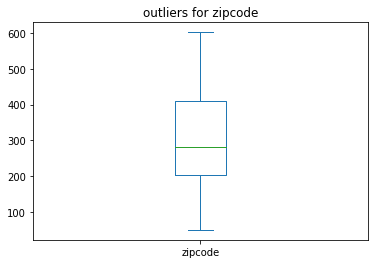

In [ ]:
houses['zipcode'].value_counts().plot.box(title='outliers for zipcode')

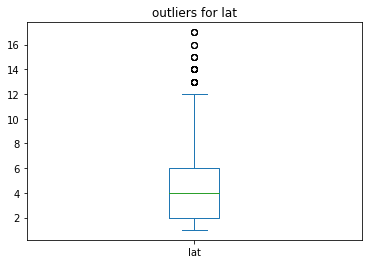

In [ ]:
houses['lat'].value_counts().plot.box(title='outliers for lat')

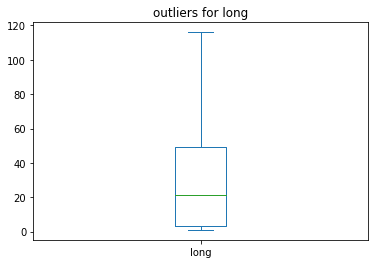

In [ ]:
houses['long'].value_counts().plot.box(title='outliers for long')

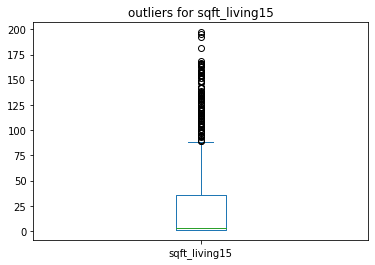

In [ ]:
houses['sqft_living15'].value_counts().plot.box(title='outliers for sqft_living15')

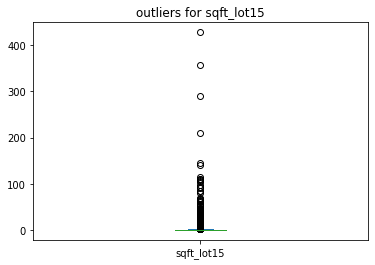

In [ ]:
houses['sqft_lot15'].value_counts().plot.box(title='outliers for sqft_lot15')

In [ ]:
# Finding anomalies in the data
houses.duplicated().sum()  # There are 3 duplicates.

3

In [ ]:
# Dropping the duplicates
houses = houses.drop_duplicates()

In [ ]:
# confirming dropped duplicates
houses.duplicated().sum()

0

In [ ]:
# Finding and dealing with null values.
houses.isnull().sum()   # There are no null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Other cleaning procedures
# Dropping irrelevant columns
houses = houses.drop('id', axis = 1)
houses = houses.drop('zipcode', axis = 1)
houses = houses.drop('lat', axis = 1)
houses = houses.drop('long', axis = 1)
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


## Exploratory Data Analysis

### Univariate Analysis

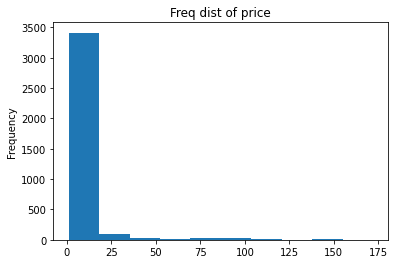

In [ ]:
# Plotting univariate graphs and recording their observations

houses['price'].value_counts().plot.hist(title='Freq dist of price');

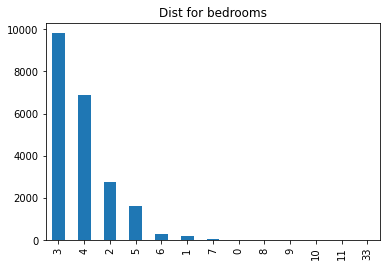

In [ ]:
houses['bedrooms'].value_counts().plot.bar(title='Dist for bedrooms');


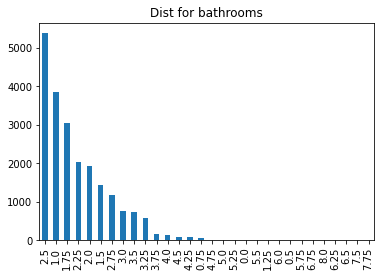

In [ ]:
houses['bathrooms'].value_counts().plot.bar(title='Dist for bathrooms');


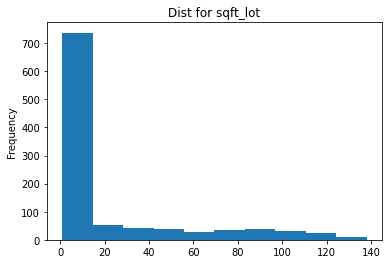

In [ ]:
houses['sqft_living'].value_counts().plot.hist(title='Dist for sqft_lot');


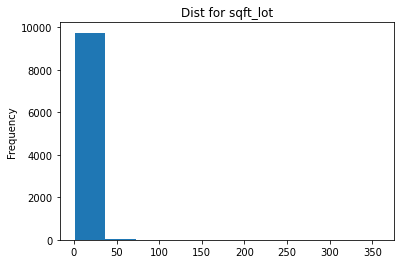

In [ ]:
houses['sqft_lot'].value_counts().plot.hist(title='Dist for sqft_lot');


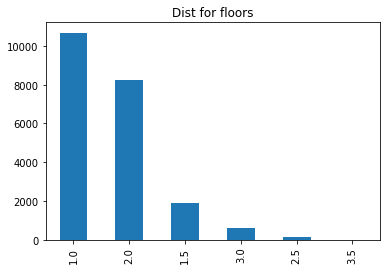

In [ ]:
houses['floors'].value_counts().plot.bar(title='Dist for floors');


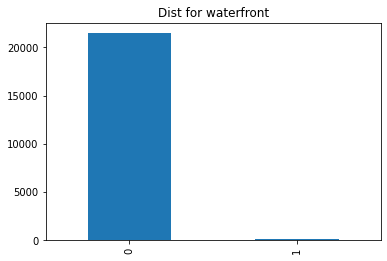

In [ ]:
houses['waterfront'].value_counts().plot.bar(title='Dist for waterfront');

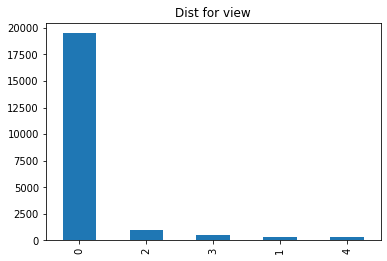

In [ ]:
houses['view'].value_counts().plot.bar(title='Dist for view');


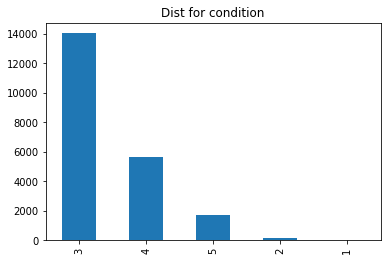

In [ ]:
houses['condition'].value_counts().plot.bar(title='Dist for condition');


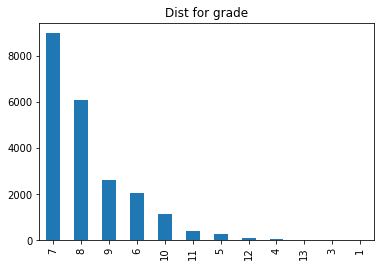

In [ ]:
houses['grade'].value_counts().plot.bar(title='Dist for grade');


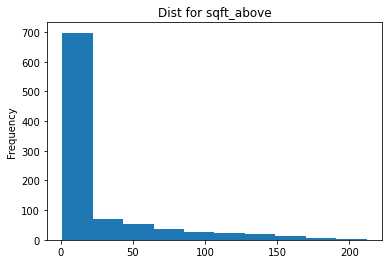

In [ ]:
houses['sqft_above'].value_counts().plot.hist(title='Dist for sqft_above');


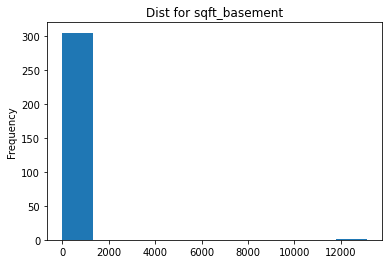

In [ ]:
houses['sqft_basement'].value_counts().plot.hist(title='Dist for sqft_basement');


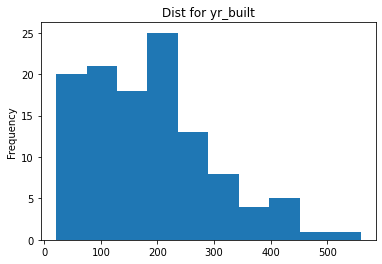

In [ ]:
houses['yr_built'].value_counts().plot.hist(title='Dist for yr_built');


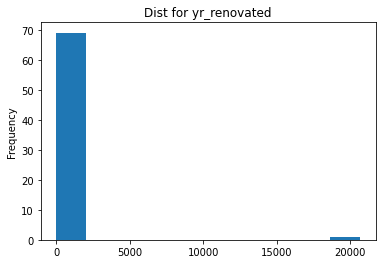

In [ ]:
houses['yr_renovated'].value_counts().plot.hist(title='Dist for yr_renovated');


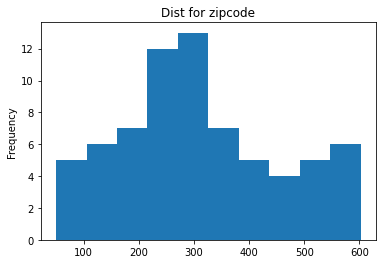

In [ ]:
houses['zipcode'].value_counts().plot.hist(title='Dist for zipcode');


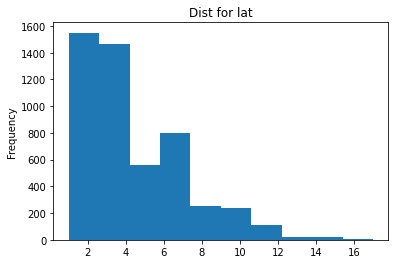

In [ ]:
houses['lat'].value_counts().plot.hist(title='Dist for lat');


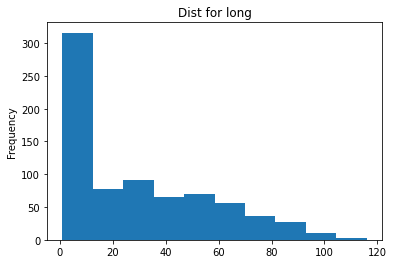

In [ ]:
houses['long'].value_counts().plot.hist(title='Dist for long');


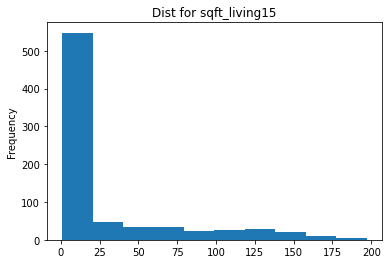

In [ ]:
houses['sqft_living15'].value_counts().plot.hist(title='Dist for sqft_living15');


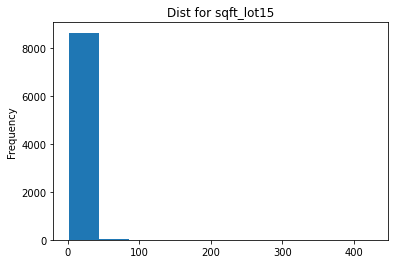

In [ ]:
houses['sqft_lot15'].value_counts().plot.hist(title='Dist for sqft_lot15');


In [ ]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))
 
# Accuracy = 1.1%. Really really low and unreliable. (I tried to get it higher but couldn't so I'll just work with it.)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.011337343822304488


### Bivariate Analysis

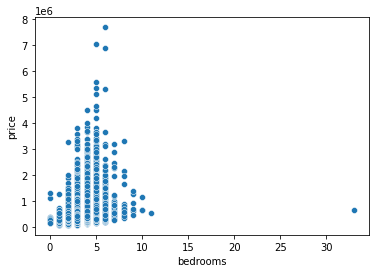

In [446]:
# Plotting bargraph to show how bedrooms relates to the price.
sns.scatterplot(x = houses['bedrooms'], y = y)

In [448]:
# Calculating correlation of bedrooms and price.
bedrooms_vs_price_corr = houses['bedrooms'].corr(y, method = 'pearson')
print(bedrooms_vs_price_corr)
# There is a little positive correlation.

0.30834618286880155


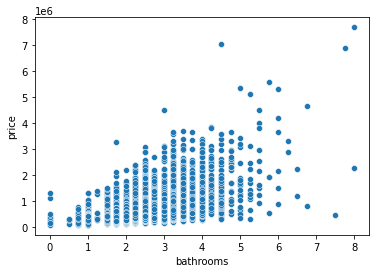

In [454]:
# Plotting bargraph to show how bathrooms relates to the price.
sns.scatterplot(x = houses['bathrooms'], y = y)

In [455]:
# Calculating correlation of sqft_living and price.
bathrooms_vs_price_corr = houses['bathrooms'].corr(y, method = 'pearson')
print(bathrooms_vs_price_corr)
# There is a positive correlation.

0.5251399153586778


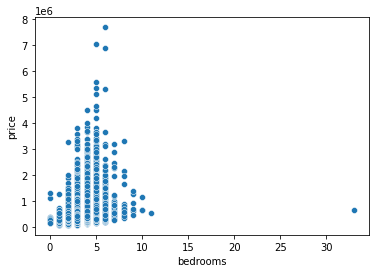

In [ ]:
# Plotting bargraph to show how sqft_living relates to the price.
sns.scatterplot(x = houses['sqft_living'], y = y)

In [458]:
# Calculating correlation of sqft_lot and price.
sqft_living_vs_price_corr = houses['sqft_living'].corr(y, method = 'pearson')
print(sqft_living_vs_price_corr)
# There is a positive correlation.

0.7020458744303416


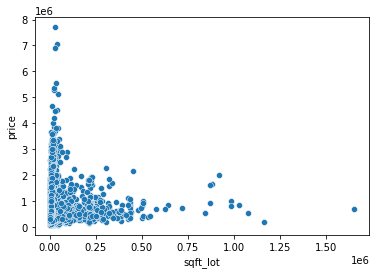

In [459]:
# Plotting bargraph to show how sqft_lot relates to the price.
sns.scatterplot(x = houses['sqft_lot'], y = y)

In [460]:
# Calculating correlation of sqft_lot and price.
sqft_lot_vs_price_corr = houses['sqft_lot'].corr(y, method = 'pearson')
print(sqft_lot_vs_price_corr)
# There is a very weak positive correlation.

0.08965768996514413


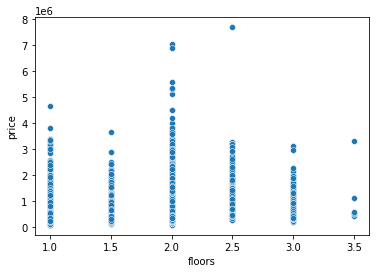

In [461]:
# Plotting bargraph to show how floors relates to the price.
sns.scatterplot(x = houses['floors'], y = y)

In [462]:
# Calculating correlation of floors and price.
floors_vs_price_corr = houses['floors'].corr(y, method = 'pearson')
print(floors_vs_price_corr)
# There is a weak positive correlation.

0.2567932473152905


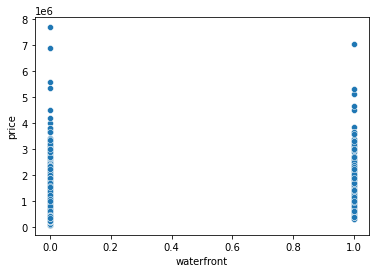

In [463]:
# Plotting bargraph to show how waterfront relates to the price.
sns.scatterplot(x = houses['waterfront'], y = y)

In [465]:
# Calculating correlation of waterfront and price.
waterfront_vs_price_corr = houses['waterfront'].corr(y, method = 'pearson')
print(waterfront_vs_price_corr)
# There is a weak positive correlation.

0.2663315198159196


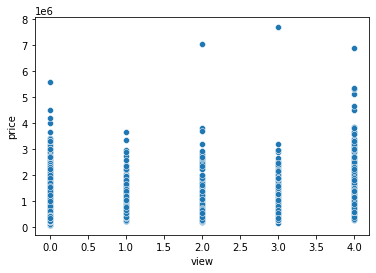

In [466]:
# Plotting bargraph to show how view relates to the price.
sns.scatterplot(x = houses['view'], y = y)

In [467]:
# Calculating correlation of view and price.
view_vs_price_corr = houses['view'].corr(y, method = 'pearson')
print(view_vs_price_corr)
# There is a weak positive correlation.

0.39746598194021615


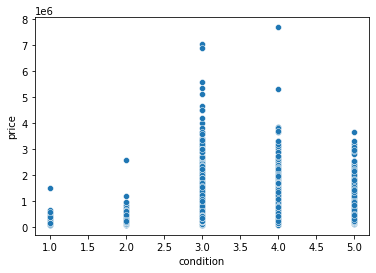

In [468]:
# Plotting bargraph to show how condition relates to the price.
sns.scatterplot(x = houses['condition'], y = y)

In [469]:
# Calculating correlation of condition and price.
condition_vs_price_corr = houses['condition'].corr(y, method = 'pearson')
print(condition_vs_price_corr)
# There is a very weak positive correlation.

0.0363968999538525


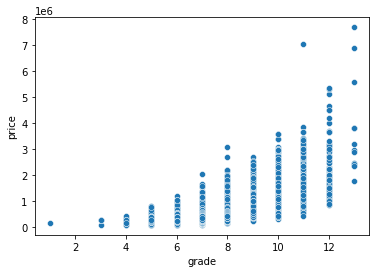

In [470]:
# Plotting bargraph to show how grade relates to the price.
sns.scatterplot(x = houses['grade'], y = y)

In [471]:
# Calculating correlation of grade and price.
grade_vs_price_corr = houses['grade'].corr(y, method = 'pearson')
print(grade_vs_price_corr)
# There is a positive correlation.

0.667478445706622


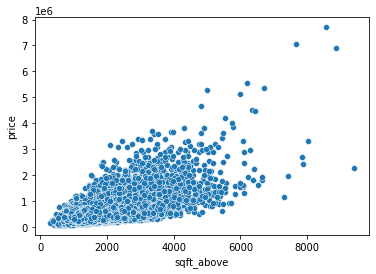

In [472]:
# Plotting bargraph to show how sqft_above relates to the price.
sns.scatterplot(x = houses['sqft_above'], y = y)

In [473]:
# Calculating correlation of sqft_above and price.
sqft_above_vs_price_corr = houses['sqft_above'].corr(y, method = 'pearson')
print(sqft_above_vs_price_corr)
# There is a positive correlation.

0.605568699185175


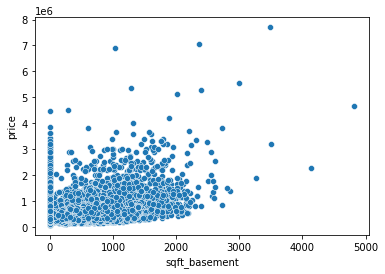

In [474]:
# Plotting bargraph to show how sqft_basement relates to the price.
sns.scatterplot(x = houses['sqft_basement'], y = y)

In [475]:
# Calculating correlation of sqft_basement and price.
sqft_basement_vs_price_corr = houses['sqft_basement'].corr(y, method = 'pearson')
print(sqft_basement_vs_price_corr)
# There is a weak positive correlation.

0.32384890409113437


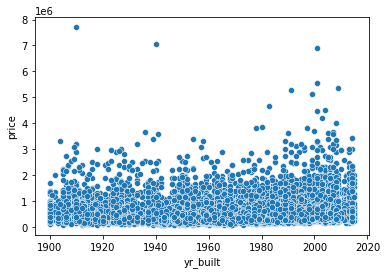

In [476]:
# Plotting bargraph to show how yr_built relates to the price.
sns.scatterplot(x = houses['yr_built'], y = y)

In [477]:
# Calculating correlation of yr_built and price.
yr_built_vs_price_corr = houses['yr_built'].corr(y, method = 'pearson')
print(yr_built_vs_price_corr)
# There is a very weak positive correlation.

0.05398030711652618


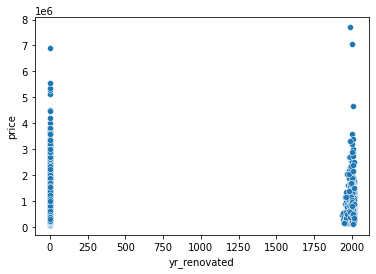

In [478]:
# Plotting bargraph to show how yr_renovated relates to the price.
sns.scatterplot(x = houses['yr_renovated'], y = y)

In [479]:
# Calculating correlation of yr_renovated and price.
yr_renovated_vs_price_corr = houses['yr_renovated'].corr(y, method = 'pearson')
print(yr_renovated_vs_price_corr)
# There is a weak positive correlation.

0.12650347759230446


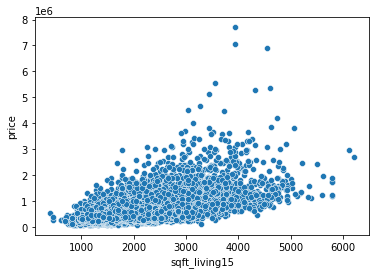

In [480]:
# Plotting bargraph to show how sqft_living15 relates to the price.
sns.scatterplot(x = houses['sqft_living15'], y = y)

In [483]:
# Calculating correlation of sqft_living15 and price.
sqft_living15_vs_price_corr = houses['sqft_living15'].corr(y, method = 'pearson')
print(sqft_living15_vs_price_corr)
# There is a positive correlation.

0.5853822543199487


In [457]:
print(X.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


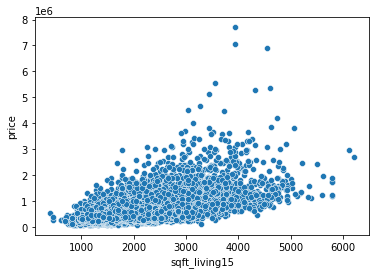

In [ ]:
# Plotting bargraph to show how sqft_lot15 relates to the price.
sns.scatterplot(x = houses['sqft_lot15'], y = y)

In [484]:
# Calculating correlation of sqft_lot15 and price.
sqft_lot15_vs_price_corr = houses['sqft_lot15'].corr(y, method = 'pearson')
print(sqft_lot15_vs_price_corr)
# There is a very weak positive correlation.

0.0824574487206532


### Multivariate Analysis.

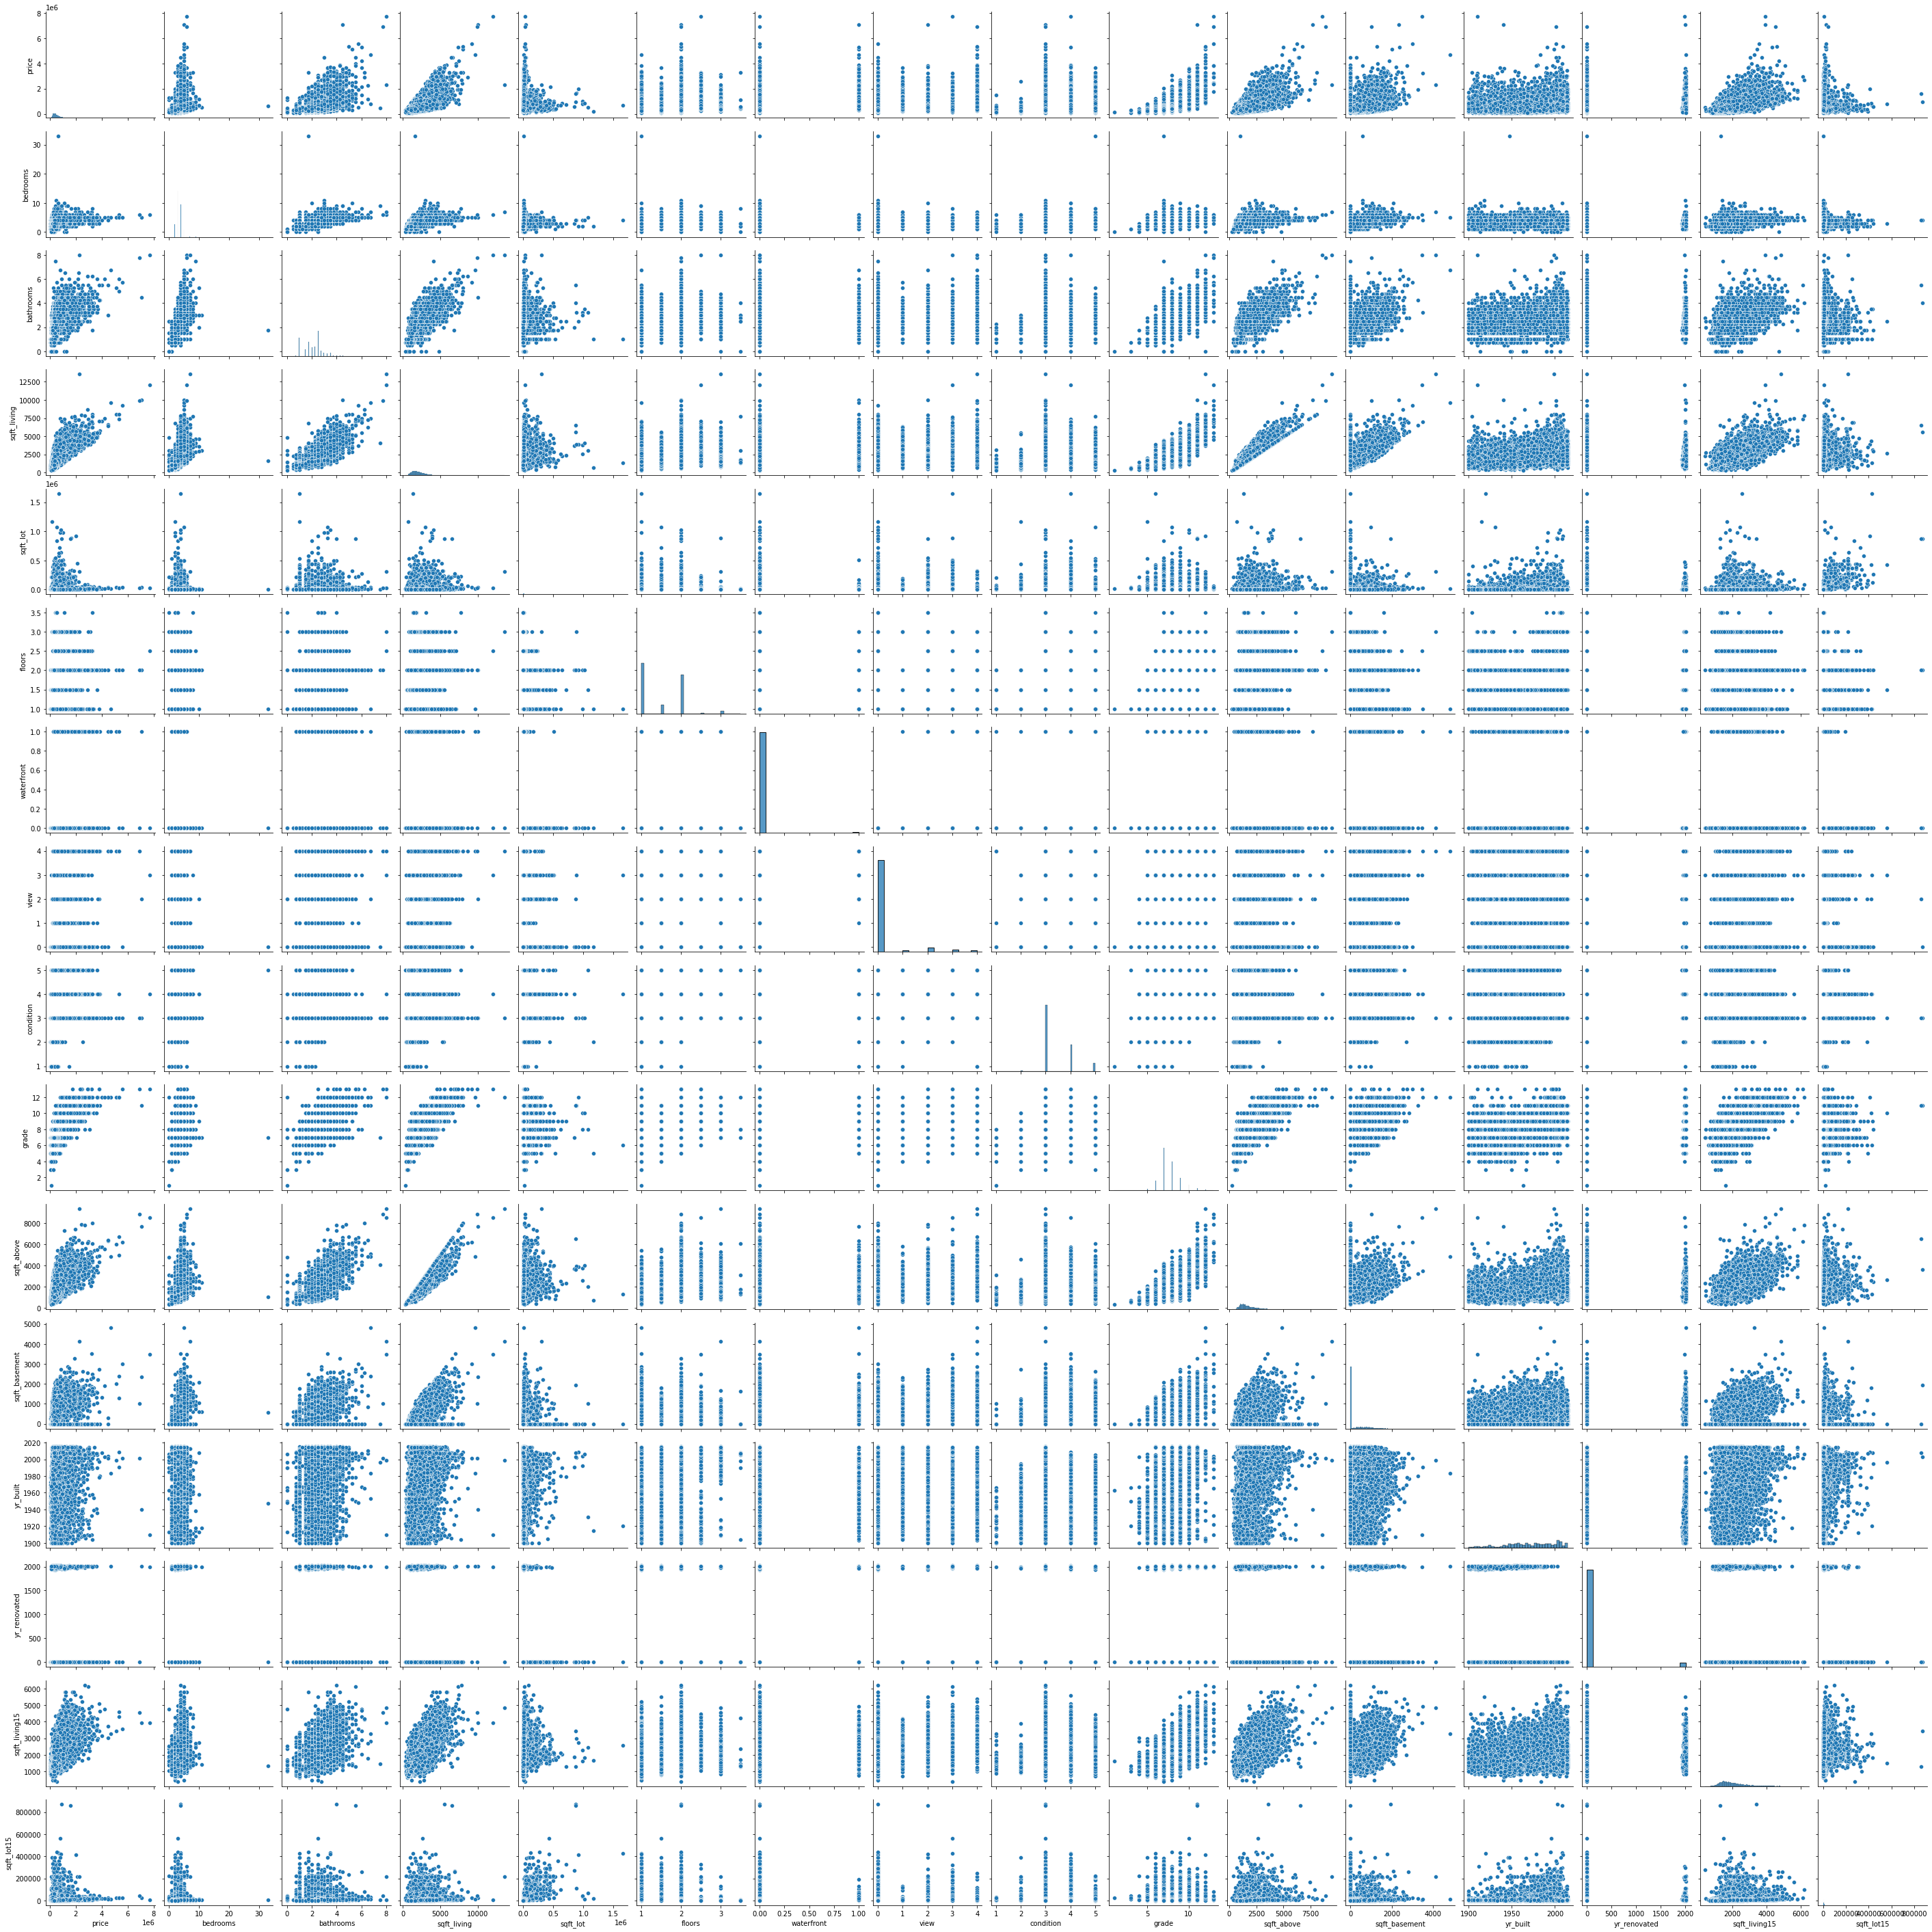

In [485]:
# Below are multivariate plots for the dataset. Showing how each variable is correlated to the others.
sns.pairplot(houses)

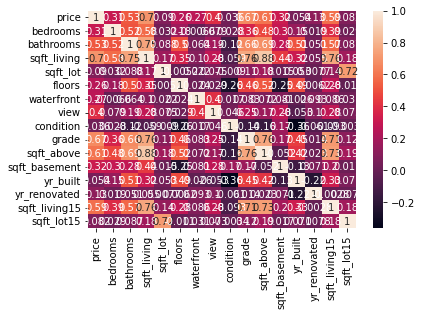

In [487]:
# Below is a heatmap showing the correlations between each value and all other values in the dataset.
sns.heatmap(houses.corr(),annot=True)
plt.show()

In [488]:
# The individual values of correlation have been documented in the bivariate analysis section.
# Only sqft_living , sqft_above and grade showed very high positive correlatins with price.

## Regression Analysis

*    Multiple Linear Regression
*    Quantile Regression
*    Ridge Regression
*    Lasso Regression
*    Elastic Net Regression

### Multiple Linear regression

In [ ]:
X = houses[['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition', 'grade',
            'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'sqft_living15',	'sqft_lot15']]
y = houses['price']

In [ ]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Algorithm
# ---
# Training the algorithm using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# In case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df
 
# We can see that "sqft_lot" and "sqft_lot15" have a very little effect on the price of the houses.

,Coefficient
bedrooms,-39501.182190
bathrooms,43419.631324
sqft_living,109.979890
sqft_lot,0.005891
floors,26286.524442
waterfront,641728.043334
view,43124.303116
condition,20235.093700
grade,119735.302715
sqft_above,50.540325


In [ ]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
9790,680200.0,631800.609566
10280,550000.0,467862.758801
21572,230000.0,248678.823371
20060,379950.0,505932.643021
21204,1060000.0,838042.532853
...,...,...
17762,300000.0,227981.703911
13211,395000.0,706964.747897
8108,395000.0,558943.369107
19728,489000.0,425966.639374


In [ ]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 210453.9864782802, 
# which is slightly greater than 15% of the mean value of the house prices. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 139286.55081358584
Mean Squared Error: 44290880424.60014
Root Mean Squared Error: 210453.9864782802


### Quantile Regression

In [493]:
X2 = houses[['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'view',	'condition']]
y2 = houses[['grade','sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated', 'sqft_living15',	'sqft_lot15']]

In [ ]:
## Creating a linear regression model regression on the above dataset
#
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True) #, normalize = False)
model1.fit(X, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X, y)))


Mean squared error: 46722423967.52
Variance score: 0.65


Text(0.5, 1.0, 'Linear regression')

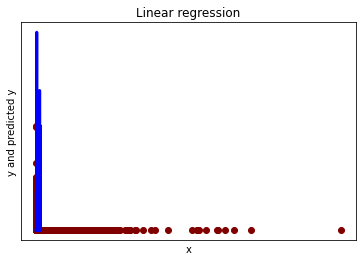

In [494]:
## Plotting the regression
plt.figure(2)
plt.scatter(X2, y2,  color='maroon')
plt.plot(X2, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression")

# This will lead to us having modeled our data well on our dataset.
# Our variance score of 0.65 is somehow close to 1 which usually is when
# we model our data perfectly. 

In [498]:
## Let's now trying to fit a linear regression
# 
model2 = LinearRegression(fit_intercept = True) #, normalize = False)
model2.fit(X2, y2)

y_pred2 = model2.predict(X2)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred2 - y2) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(X2, y2)))



TypeError: ignored

In [ ]:
## Implementing quantile regression for the median, 0.5th quantile

# We take the data into a pandas dataframe so that its easier for us to work with statsmodel interfaces. 
# Our dataframe data has two columns, ‘x’ and ‘y’

# X = houses['bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition', 'grade',
#             'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated', 'sqft_living15',	'sqft_lot15']
# y = houses['price']
#
data = pd.DataFrame(data = np.hstack([X2, y2]), columns = ["x", "y"])
data.head()

In [ ]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', data)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# You see that our intercept is 6.0978 and our slope or the coefficient for our x is 0.0976. 
# These are the parameters for the 0.5th quantile of our y. 

In [ ]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.

In [ ]:
## Plot the changes in the quantile coeffiecients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
plt.title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--']
plt.show()

# We would be able to see how the slope value varies for different quantiles. 
# Compared with linear regression which is flat across all the quantiles, 
# Quantile Regression allows us to investigate into the different areas of the data 
# and model them appropriately.

### Ridge Regression

In [ ]:
# Importing our libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

# The output  value of 46722423967.51934 will be our indicator to determine if the regularized ridge regression model is superior or not.

46722423967.51934


In [ ]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 47428118503.96149 is greater than what the baseline model was. 

47428118503.96149

In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

# Value = 46730236318.48777

46730236318.48777


In [ ]:
# The 46730236318.48777 is lower than the 47428118503.96149. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.
# Therefore this model performs almost equally with the linear regression.

{'bathrooms': 45694.56194176707,
 'bedrooms': -39311.087343872015,
 'condition': 19573.604792328762,
 'floors': 26958.494819697986,
 'grade': 119822.65085157433,
 'sqft_above': 51.54704015504103,
 'sqft_basement': 57.78180216122428,
 'sqft_living': 109.32884229504998,
 'sqft_living15': 24.88770995746927,
 'sqft_lot': -0.002059160491626244,
 'sqft_lot15': -0.5502287100935064,
 'view': 43390.488751472636,
 'waterfront': 578744.0611101721,
 'yr_built': -3572.349517547786,
 'yr_renovated': 10.362532343320936}

### Lasso Regression 

In [ ]:
# Loading our libraries
#
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standadizing our features
#
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Fitting Lasso Regression
# The hyperparameter, α, lets us control how much we penalize the coefficients, 
# with higher values of α creating simpler modelers. The ideal value of α
# should be tuned like any other hyperparameter. In scikit-learn, α
# is set using the alpha parameter.
# 

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.5)

# Fitting the linear regression
model = regr.fit(X_std, y)


In [ ]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6998054407063499
lasso MSE: 40516476689.554474
lasso coef: [-3.57676527e+04  4.10831339e+04  2.85044337e+02  1.28098034e-01
  6.77345227e+03  5.82445180e+05  5.30438878e+04  2.64493557e+04
  9.59890957e+04 -1.03722874e+02 -1.34853484e+02 -2.62232384e+03
  2.00369749e+01 -5.82544539e+02  6.02855145e+05 -2.14659792e+05
  2.16896141e+01 -3.82392323e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.987e+14, tolerance: 2.917e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.661614374368982
linear score: 0.6616146881618584
lasso MSE: 46017741263.65464
linear MSE: 46017698590.33076
lasso best estimator coef: [-4.02111351e+04  4.22808490e+04  3.01666871e+02 -9.89346108e-04
  2.96869547e+04  5.20277284e+05  4.47371358e+04  1.79608180e+04
  1.19640907e+05 -1.38051026e+02 -1.26406042e+02 -3.53459632e+03
  7.92457862e+00  2.13551781e+01 -5.41879610e-01]
linear coef: [-4.02112590e+04  4.22812927e+04  1.12958667e+02 -9.88544445e-04
  2.96873872e+04  5.20291243e+05  4.47365695e+04  1.79610852e+04
  1.19641041e+05  5.06567107e+01  6.23019564e+01 -3.53460177e+03
  7.92429196e+00  2.13552416e+01 -5.41879374e-01]


In [ ]:
# From the result above, it can be noted that the values and performance of the Lasso regression compared to Linear regression has almost no difference,
# therefore their performance is almost the same.

# lasso score: 0.661614374368982
# linear score: 0.6616146881618584
# lasso MSE: 46017741263.65464
# linear MSE: 46017698590.33076

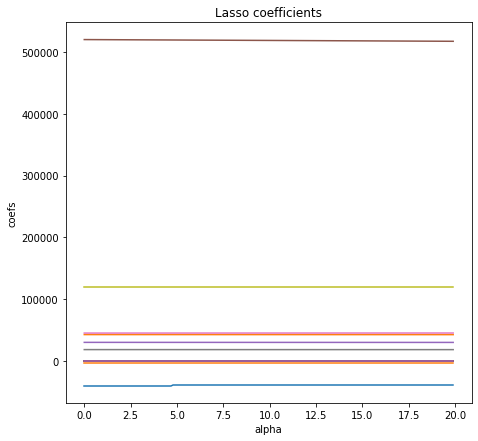

In [ ]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

### Elastic Net Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [ ]:
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

# This mean standard error score of 46722423967.51934 is our benchmark for determining 
# if the elastic net model will be better or worst. 

46722423967.51934


In [ ]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, column in zip(regression.coef_,X.columns):
    coef_dict_baseline[column] = coef
coef_dict_baseline

{'bathrooms': 45694.56194176707,
 'bedrooms': -39311.087343872015,
 'condition': 19573.604792328762,
 'floors': 26958.494819697986,
 'grade': 119822.65085157433,
 'sqft_above': 51.54704015504103,
 'sqft_basement': 57.78180216122428,
 'sqft_living': 109.32884229504998,
 'sqft_living15': 24.88770995746927,
 'sqft_lot': -0.002059160491626244,
 'sqft_lot15': -0.5502287100935064,
 'view': 43390.488751472636,
 'waterfront': 578744.0611101721,
 'yr_built': -3572.349517547786,
 'yr_renovated': 10.362532343320936}

In [ ]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

47428118503.96149

In [ ]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 47428118503.96149. This is above our baseline model of MSE 46722423968.215805 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=1.0)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

46722423968.215805


In [ ]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that sqft above was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 45693.27790067707,
 'bedrooms': -39310.895585283964,
 'condition': 19573.345000111105,
 'floors': 26958.43653531542,
 'grade': 119822.88409463267,
 'sqft_above': -135.70851925493392,
 'sqft_basement': -129.47353615736355,
 'sqft_living': 296.58559076324207,
 'sqft_living15': 24.886482917201555,
 'sqft_lot': -0.002055191824985912,
 'sqft_lot15': -0.5502285040303659,
 'view': 43390.514380504865,
 'waterfront': 578742.8110477336,
 'yr_built': -3572.337290853075,
 'yr_renovated': 10.362292214171543}

## Multicollinearity check

In [ ]:
# Getting the correlations of the independent variables.
independent_only = X

correlations = independent_only.corr()

correlations

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,0.391633,0.029233
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,0.568665,0.087191
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,0.756420,0.183285
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,0.144620,0.718556
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,0.279861,-0.011250
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.086469,0.030702
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.280404,0.072577
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,-0.092854,-0.003424
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,0.713208,0.119265
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,0.423922,0.023233,0.731870,0.194060


In [ ]:
# Computing VIF scores
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644186,-0.461011,2.194562e-01,0.044586,0.070643,0.061394,0.117541,-0.064963,0.326244,-1.110117e+00,-5.876627e-01,0.092827,0.039971,0.012496,0.082130
bathrooms,-0.461011,3.348329,-1.000768e+00,-0.019162,-0.681763,0.009537,-0.039280,-0.136581,-0.288261,-3.619800e-01,-6.174953e-01,-0.916321,-0.258046,0.095868,0.076591
sqft_living,0.245255,-0.959118,2.229226e+14,-0.232512,0.063502,0.314035,-0.962565,-0.330466,2.482971,-2.009916e+14,-1.074195e+14,-0.951449,-0.010687,2.218730,0.361770
sqft_lot,0.044586,-0.019162,-2.217190e-01,2.088118,0.074213,0.028246,-0.051996,0.019147,-0.006197,-3.483551e-02,8.530653e-02,0.026133,0.012442,0.127176,-1.474744
floors,0.070643,-0.681763,7.797247e-02,0.074213,1.931962,-0.003969,-0.062789,0.132884,-0.326805,-5.054805e-01,5.246771e-01,-0.301452,-0.056955,0.358992,0.101144
waterfront,0.061394,0.009537,3.181104e-01,0.028246,-0.003969,1.203300,-0.493571,-0.015267,0.047955,-3.962862e-01,-1.569598e-01,-0.021977,-0.066202,0.057239,-0.016950
view,0.117541,-0.039280,-9.782767e-01,-0.051996,-0.062789,-0.493571,1.404335,-0.008112,-0.184309,9.297300e-01,2.012275e-01,0.198983,-0.034075,-0.264061,0.001992
condition,-0.064963,-0.136581,-3.358817e-01,0.019147,0.132884,-0.015267,-0.008112,1.221674,-0.016480,3.360068e-01,9.091184e-02,0.472734,0.195040,0.036100,-0.037930
grade,0.326244,-0.288261,2.442639e+00,-0.006197,-0.326805,0.047955,-0.184309,-0.016480,3.234547,-3.688494e+00,-1.735201e+00,-0.397166,-0.040833,-0.828842,0.120046
sqft_above,-1.106570,-0.393871,-2.009916e+14,-0.025608,-0.494626,-0.392680,0.914457,0.329953,-3.721022,1.812182e+14,9.685160e+13,1.204528,-0.012744,-3.611365,-0.540032


In [ ]:
# Removing the variables with large VIF values. i.e grade and sqft_basement
revised = independent_only.drop(columns=['grade'])
revised = independent_only.drop(columns=['sqft_basement'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.644186,-0.461011,-0.980236,0.044586,0.070643,0.061394,0.117541,-0.064963,0.326244,-0.001642,0.092827,0.039971,0.012496,0.082130
bathrooms,-0.461011,3.348329,-2.251117,-0.019162,-0.681763,0.009537,-0.039280,-0.136581,-0.288261,0.771021,-0.916321,-0.258046,0.095868,0.076591
sqft_living,-0.980236,-2.251117,8.504132,-0.044713,1.167902,-0.007176,-0.563784,-0.148430,-1.151637,-4.789726,0.761324,0.002562,-0.851225,-0.079142
sqft_lot,0.044586,-0.019162,-0.044713,2.088118,0.074213,0.028246,-0.051996,0.019147,-0.006197,-0.194930,0.026133,0.012442,0.127176,-1.474744
floors,0.070643,-0.681763,1.167902,0.074213,1.931962,-0.003969,-0.062789,0.132884,-0.326805,-1.490375,-0.301452,-0.056955,0.358992,0.101144
waterfront,0.061394,0.009537,-0.007176,0.028246,-0.003969,1.203300,-0.493571,-0.015267,0.047955,-0.103070,-0.021977,-0.066202,0.057239,-0.016950
view,0.117541,-0.039280,-0.563784,-0.051996,-0.062789,-0.493571,1.404335,-0.008112,-0.184309,0.554907,0.198983,-0.034075,-0.264061,0.001992
condition,-0.064963,-0.136581,-0.148430,0.019147,0.132884,-0.015267,-0.008112,1.221674,-0.016480,0.165826,0.472734,0.195040,0.036100,-0.037930
grade,0.326244,-0.288261,-1.151637,-0.006197,-0.326805,0.047955,-0.184309,-0.016480,3.234547,-0.443985,-0.397166,-0.040833,-0.828842,0.120046
sqft_above,-0.001642,0.771021,-4.789726,-0.194930,-1.490375,-0.103070,0.554907,0.165826,-0.443985,6.553364,-0.339743,-0.024689,-0.843431,-0.142497


In [ ]:
# There is not much of a big difference, hence it can be assumed tha the independent variables were not collinear.

## Residual Plots

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = houses['price'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-4007.4202122422316

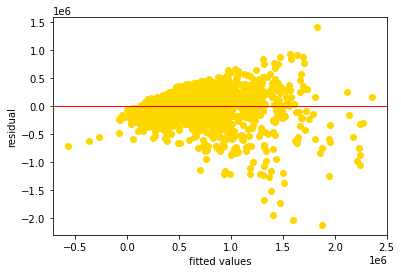

In [ ]:
# Residual Plot
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='gold')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use [bartlett's test](https://www.itl.nist.gov/div898/handbook/eda/section3/eda357.htm). The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.


## Heteroskedasticity check using Barlett's test

In [ ]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

# Okay, I don't seem to get what 'inf' is, but there appears to be no reason to reassure the model.

inf
the variances are homogeneous!


## Recommendation

In [ ]:
# Owing to the accuracy, computing effort of the models explored, it would be best to choose the linear model.

## Challenging the solution by providing insights on how improvements in model can be made.

In [ ]:
# Using a different type of regression: Simple linear regression, for one variable, the one with the highest correlation with the dependent variable.

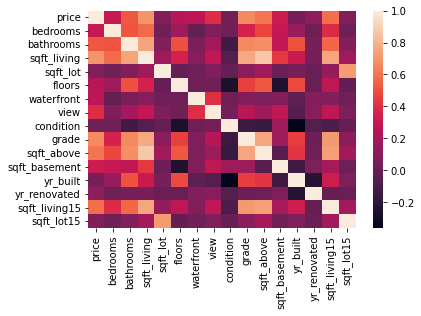

In [ ]:
sns.heatmap(houses.corr(),annot=False)
plt.show()

In [ ]:
# Training the Algorithm
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# With Scikit-Learn it is extremely straight forward to implement linear regression models, 
# as all you really need to do is import the LinearRegression class, instantiate it, 
# and call the fit() method along with our training data. 
# This is about as simple as it gets when using a machine learning library to train on your data.

LinearRegression()

In [ ]:
# Getting the intercept and slope
# ---
# In the theory section we said that linear regression model basically 
# finds the best value for the intercept and slope, which results in a line that best fits the data. 
# To see the value of the intercept and slope calculated 
# by the linear regression algorithm for our dataset, execute the following code.
# ---
# 

# intercept
# 
print(regressor.intercept_)

# slope
# 
print(regressor.coef_)

# From the output of this cell, it means that for every one unit of change in grade , 
# the change in the price is about 5.05%.

6116373.932876206
[-3.95011822e+04  4.34196313e+04  1.09979890e+02  5.89107185e-03
  2.62865244e+04  6.41728043e+05  4.31243031e+04  2.02350937e+04
  1.19735303e+05  5.05403255e+01  5.94395638e+01 -3.53047195e+03
  1.01687969e+01  2.63305298e+01 -5.32356887e-01]


In [ ]:
# Making Predictions
# ---
# Now that we have trained our algorithm, it's time to make some predictions. 
# To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. 
# To make pre-dictions on the test data, execute the following
# ---
# 

# The y_pred is a numpy array that contains all the predicted values 
# for the input values in the X_test series.
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values, execute the following 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# We will note from the output that though our model is not very precise, 
# the predicted percentages are close to the actual ones.

,Actual,Predicted
9790,680200.0,631800.609566
10280,550000.0,467862.758801
21572,230000.0,248678.823371
20060,379950.0,505932.643021
21204,1060000.0,838042.532853
...,...,...
17762,300000.0,227981.703911
13211,395000.0,706964.747897
8108,395000.0,558943.369107
19728,489000.0,425966.639374


In [ ]:
# Evaluating the Algorithm
# ---
# The final step is to evaluate the performance of algorithm. 
# This step is particularly important to compare how well different algorithms perform on a particular dataset. 
# For regression algorithms, three evaluation metrics are commonly used:
# 1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
# 2. Mean Squared Error (MSE) is the mean of the squared errors.
# 3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# ---
# The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.
# Let's find the values for these metrics using our test data. ""
# 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# From the output, we will see that the value of root mean squared error is 210453.9864782802, 
# which is manytimes greater than 10% of the mean value of the percentages of all the students i.e.5.40178. 
# This means that our algorithm did not do a decent job.

Mean Absolute Error: 139286.55081358584
Mean Squared Error: 44290880424.60014
Root Mean Squared Error: 210453.9864782802


In [ ]:
# Other forms of regression may be used, and the one with the greatest accuracy and inclusivity should be chosen.